In [1]:
from evaldet import Tracks, MOTMetrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


pd.set_option('precision', 2)

print(plt.rcParams["figure.figsize"])

[6.4, 4.8]


In [2]:

#gt_tracks = Tracks.from_mot('./DATA/output_4_gt.txt')
gt_tracks = Tracks.from_mot('./DATA/minut_annotations.txt')

### ¡¡¡FILES USING GT TRACKS AS THE BASE!!! ###
#tracks = Tracks.from_mot('./OUTPUT/reid_test_00025/results.txt')                           # 0.66 (LocA=1) (--thr=0.00025) (minut)

### ¡¡¡FILES USING THE SAME DETECTIONS USED FOR GENERATING THE GROUND TRUTH!!! ###
#tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_16163.txt')                    # 0.87 (LocA=1)
#tracks = Tracks.from_mot('./OUTPUT/results_preds_deepocsort.txt')                          # 0.81 (LocA=1)

### ¡¡¡FILES USING THE DETECTIONS USED AS A BASE FOR THE GROUND TRUTH!!! ###
#tracks = Tracks.from_mot('./OUTPUT/minut_fgbg_ocsort_trck.txt')                            # 0.28 (LocA=0.65)
#tracks = Tracks.from_mot('./OUTPUT/minut_fgbg_deepocsort_trck.txt')                        # 0.64 (LocA=0.93)

### FILES USING KALMAN PREDICTIONS (AND SAME DETECTIONS) ###
#tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_kalman.txt')                   # 0.41 (LocA=0.68)
#tracks = Tracks.from_mot('./OUTPUT/output_4_kalman_pca.txt')                               # 0.41 (LocA=0.68)

### FILES USING NEW DETECTORS WITH THIS DATA INCLUDED ###
#tracks = Tracks.from_mot('./OUTPUT/minut_yolo_ocsort_trck.txt')                            # 0.18 (LocA=0.63)
#tracks = Tracks.from_mot('./OUTPUT/minut_post_yolo_ocsort_trck.txt')                       # 0.23 (LocA=0.68)
#tracks = Tracks.from_mot('./OUTPUT/minut_post_yolo_deepocsort_trck.txt')                   # 0.26 (LocA=0.71)
tracks = Tracks.from_mot('./OUTPUT/minut_post_yolo_deepocsort_gsi_trck.txt')               # 0.27 (LocA=0.68)


### FILES USING NEW DETECTORS ###
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_320_v2.txt')                 # 0.04 (LocA=0.58)
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_640_08.txt')                 # 0.09 (LocA=0.59)
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_640_09.txt')                 # 0.14 (LocA=0.64)
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_640_12.txt')                 # 0.005 (LocA=0.63)
#tracks = Tracks.from_mot('./OUTPUT/post_trck_output_4_gt_trck_yolo_sahi_640_08.txt')       # 0.09 (LocA=0.59)
#tracks = Tracks.from_mot('./OUTPUT/post_trck_output_4_gt_trck_yolo_sahi_640_09.txt')       # 0.23 (LocA=0.64)
#tracks = Tracks.from_mot('./OUTPUT/post_trck_output_4_gt_trck_yolo_sahi_640_12.txt')       # 0.006 (LocA=0.63)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_08.txt')       # 0.09 (LocA=0.59)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09.txt')       # 0.23 (LocA=0.64) (--trackThreshold=0.4 --iouThreshold=0.2 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_12.txt')       # 0.006 (LocA=0.63)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v2.txt')    # 0.24 (LocA=0.64) (--trackThreshold=0.2 --iouThreshold=0.3 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v3.txt')    # 0.22 (LocA=0.64) (--trackThreshold=0.6 --iouThreshold=0.1 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v4.txt')    # 0.23 (LocA=0.64) (--trackThreshold=0.1 --iouThreshold=0.5 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v5.txt')    # 0.24 (LocA=0.64) (--trackThreshold=0.4 --iouThreshold=0.3 --associationFunc=ciou)



eval_obj = MOTMetrics(clearmot_dist_threshold=0.5, id_dist_threshold=0.5)

In [3]:
metrics = eval_obj.compute(gt_tracks, tracks, clearmot_metrics=True, id_metrics=True, hota_metrics=True)
metrics['clearmot']['MOTP'] = 1 - metrics['clearmot']['MOTP']

In [4]:
print('CLEARMOT')
print(pd.DataFrame(metrics['clearmot'], index=['values']))
print('-' * 10)
print('IDs')
print(pd.DataFrame(metrics['id'], index=['values']))
print('-' * 10)
print('HOTA')
print(pd.DataFrame({k : v for k, v in metrics['hota'].items() if k in ['HOTA', 'DetA', 'AssA', 'LocA']}, index=['values']))

CLEARMOT
        MOTP  MOTA  FP_CLEAR  FN_CLEAR  IDSW
values  0.63  0.19      2318      3124    24
----------
IDs
        IDTP  IDFP  IDFN   IDP  IDR  IDF1
values  1992  3942  4748  0.34  0.3  0.31
----------
HOTA
        HOTA  DetA  AssA  LocA
values  0.27  0.38  0.19  0.68


In [5]:
print('-' * 10)
print('HOTA alpha')

new = '_\\'
hota_alpha = pd.DataFrame({fr"${k.replace('_', new)}$" : v for k, v in metrics['hota'].items() if k not in ['HOTA', 'DetA', 'AssA', 'LocA', 'alphas_HOTA']}, index=metrics['hota']['alphas_HOTA'])
print(hota_alpha)

----------
HOTA alpha
      $HOTA_\alpha$  $DetA_\alpha$  $AssA_\alpha$  $LocA_\alpha$
0.05       0.00e+00       0.00e+00           0.00           1.00
0.10       5.00e-03       6.32e-04           0.04           0.92
0.15       9.52e-03       2.93e-03           0.03           0.88
0.20       1.60e-02       8.27e-03           0.03           0.84
0.25       3.27e-02       2.57e-02           0.04           0.80
0.30       6.53e-02       5.93e-02           0.07           0.76
0.35       1.11e-01       1.23e-01           0.10           0.72
0.40       1.68e-01       2.02e-01           0.14           0.68
0.45       2.27e-01       2.98e-01           0.17           0.65
0.50       2.98e-01       3.99e-01           0.22           0.63
0.55       3.61e-01       5.01e-01           0.26           0.61
0.60       4.13e-01       5.84e-01           0.29           0.59
0.65       4.40e-01       6.31e-01           0.31           0.58
0.70       4.57e-01       6.64e-01           0.31           0.57
0.7

(0.0, 1.0)

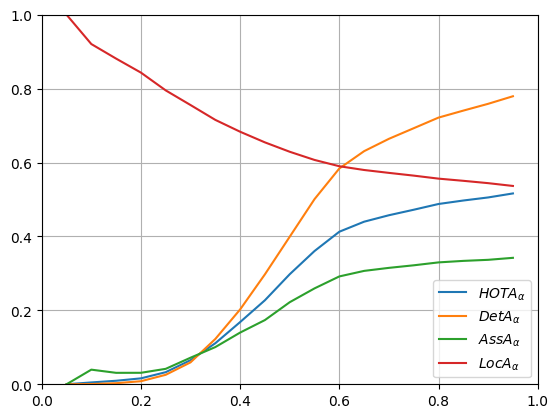

In [6]:
fig = hota_alpha.plot.line()
fig.grid(True)
fig.set_xlim(0, 1)
fig.set_ylim(0, 1)